In [1]:
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# parameters

test_size = .20
random_state = 42

n_estimators = 100
max_depth = 10

In [ ]:
data_path = Path(r'C:\Users\Kevin\projects\flight_numbers\data\interim\flight_numbers_innova.parquet')

In [ ]:
def load_raw_data(path: Path):
    return pd.read_parquet(path)

In [ ]:
df = load_raw_data(data_path)

In [ ]:
X = df[['diameter', 'height', 'rim_depth', 'inside_rim_diameter', 'rim_thickness', 'rim_depth__diameter_ratio', 'rim_configuration', 'flexibility']]

y_speed = df['SPEED']
y_glide = df['GLIDE']
y_turn = df['TURN']
y_fade = df['FADE']

In [ ]:
def prep_train_test(X, y):
    return train_test_split(X, y, test_size=.33, random_state=42)

X_train_speed, X_test_speed, y_train_speed, y_test_speed = prep_train_test(X, y_speed)

X_train_glide, X_test_glide, y_train_glide, y_test_glide = prep_train_test(X, y_glide)

X_train_turn, X_test_turn, y_train_turn, y_test_turn = prep_train_test(X, y_turn)

X_train_fade, X_test_fade, y_train_fade, y_test_fade = prep_train_test(X, y_fade)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def create_rfr():
    return RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

model_speed = create_rfr()
model_glide = create_rfr()
model_fade = create_rfr()
model_turn = create_rfr()

def fit_model(model, X, y):
    return model.fit(X, y)

fit_model(model_speed, X_train_speed, y_train_speed)
fit_model(model_glide, X_train_glide, y_train_glide)
fit_model(model_fade, X_train_turn, y_train_turn)
fit_model(model_turn, X_train_fade, y_train_fade)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
def predict_model(model, X_test):
    return model.predict(X_test)

y_predict_speed = predict_model(model_speed, X_test_speed)

y_predict_glide = predict_model(model_glide, X_test_glide)

y_predict_turn = predict_model(model_turn, X_test_turn)

y_predict_fade = predict_model(model_fade, X_test_fade)

In [ ]:
def generate_validation_metrics(y_test, y_predict):
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    return mse,r2

mse_speed, r2_speed = generate_validation_metrics(y_test_speed, y_predict_speed)
mse_glide, r2_glide = generate_validation_metrics(y_test_glide, y_test_glide)
mse_turn, r2_turn = generate_validation_metrics(y_test_turn, y_test_turn)
mse_fade, r2_fade = generate_validation_metrics(y_test_fade, y_test_fade)


c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


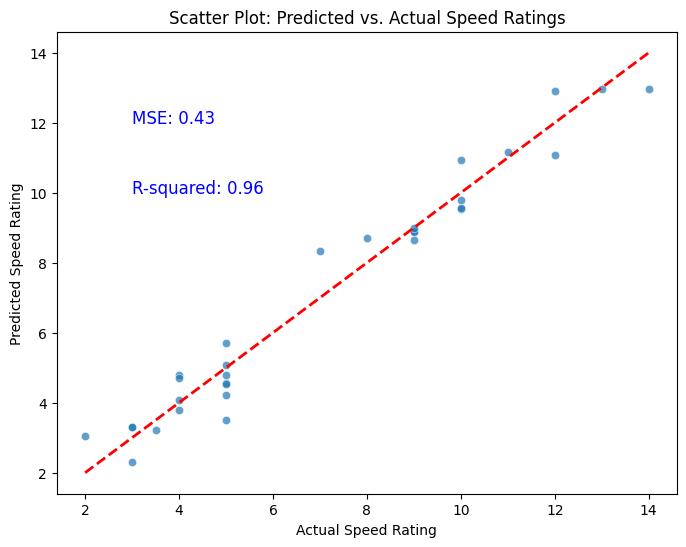

c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


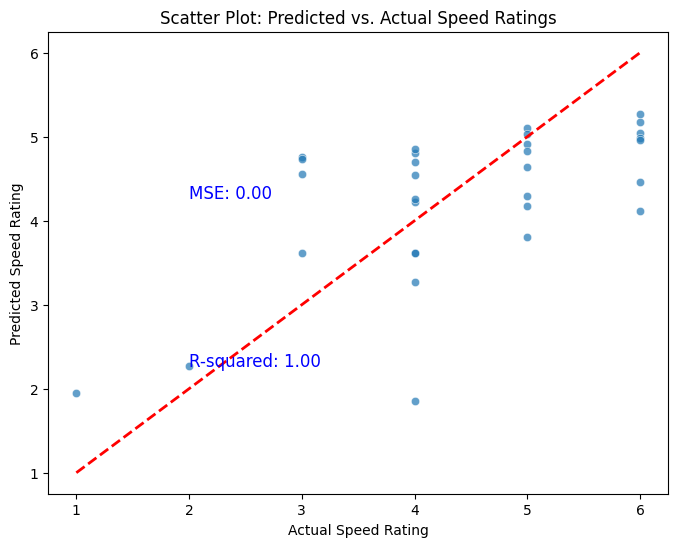

c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


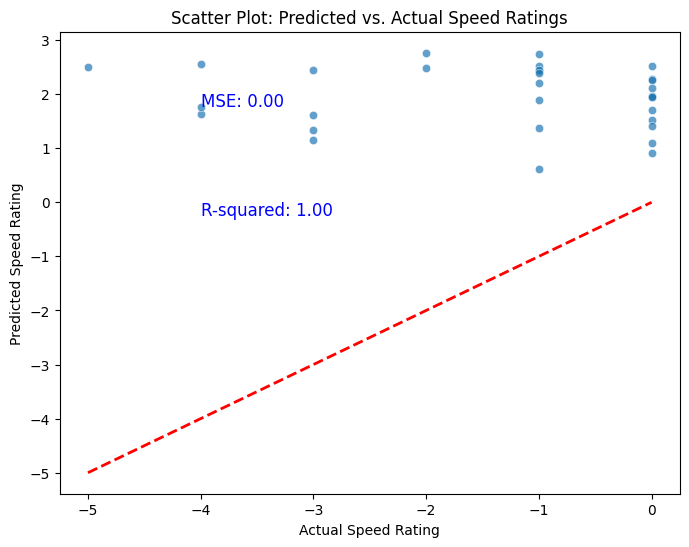

c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


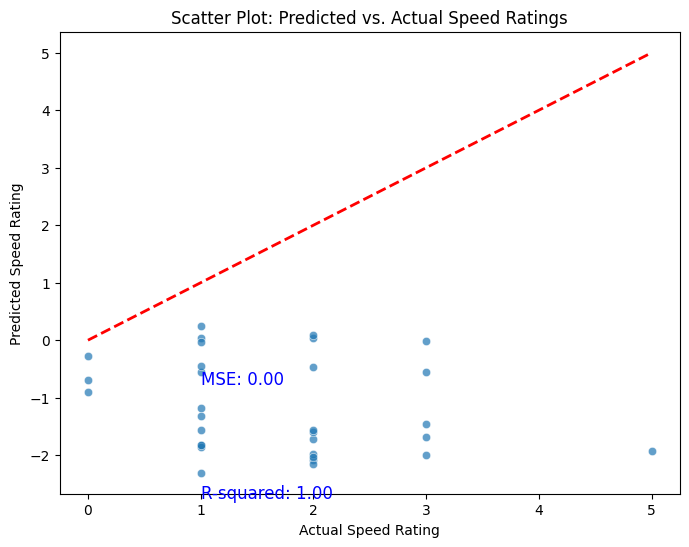

<module 'matplotlib.pyplot' from 'c:\\Users\\Kevin\\projects\\flight_numbers\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
def vizualize_results(y_test, y_predict, mse, r2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_predict, alpha=0.7)
    plt.title('Scatter Plot: Predicted vs. Actual Speed Ratings')
    plt.xlabel('Actual Speed Rating')
    plt.ylabel('Predicted Speed Rating')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

    plt.text(min(y_test) + 1, max(y_predict) - 1, f'MSE: {mse:.2f}', fontsize=12, color='blue')
    plt.text(min(y_test) + 1, max(y_predict) - 3, f'R-squared: {r2:.2f}', fontsize=12, color='blue')

    plt.show()
    return plt

vizualize_results(y_test_speed, y_predict_speed, mse_speed, r2_speed)
vizualize_results(y_test_glide, y_predict_glide, mse_glide, r2_glide)
vizualize_results(y_test_turn, y_predict_turn, mse_turn, r2_turn)
vizualize_results(y_test_fade, y_predict_fade, mse_fade, r2_fade)


In [ ]:
def show_important_features(model):
    importances = model.feature_importances_
    feature_importance = sorted(zip(importances, X.columns), reverse=True)
    for importance, feature in feature_importance:
        print(f"{feature}: {importance}")

show_important_features(model_fade)

rim_configuration: 0.2601050862185812
inside_rim_diameter: 0.23807089041346308
flexibility: 0.12556462520834813
rim_depth__diameter_ratio: 0.11205632499998046
rim_depth: 0.0885759488151668
height: 0.0760265050112867
rim_thickness: 0.07004460501738646
diameter: 0.029556014315787242


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
X = df[['diameter', 'height', 'rim_depth', 'inside_rim_diameter', 'rim_thickness', 'rim_depth__diameter_ratio', 'rim_configuration', 'flexibility']]

y_speed = df['SPEED'].astype('str')
y_glide = df['GLIDE'].astype('str')
y_turn = df['TURN'].astype('str')
y_fade = df['FADE'].astype('str')

def prep_train_test(X, y):
    return train_test_split(X, y, test_size=.33, random_state=42)

X_train_speed, X_test_speed, y_train_speed, y_test_speed = prep_train_test(X, y_speed)

X_train_glide, X_test_glide, y_train_glide, y_test_glide = prep_train_test(X, y_glide)

X_train_turn, X_test_turn, y_train_turn, y_test_turn = prep_train_test(X, y_turn)

X_train_fade, X_test_fade, y_train_fade, y_test_fade = prep_train_test(X, y_fade)

In [ ]:
def create_scv():
    return SVC(random_state=42)

model_speed = create_scv()
model_glide = create_scv()
model_fade = create_scv()
model_turn = create_scv()

def fit_model(model, X, y):
    return model.fit(X, y)

fit_model(model_speed, X_train_speed, y_train_speed)
fit_model(model_glide, X_train_glide, y_train_glide)
fit_model(model_fade, X_train_turn, y_train_turn)
fit_model(model_turn, X_train_fade, y_train_fade)


SVC(random_state=42)

In [ ]:
def predict_model(model, X_test):
    return model.predict(X_test)

y_predict_speed = predict_model(model_speed, X_test_speed)

y_predict_glide = predict_model(model_glide, X_test_glide)

y_predict_turn = predict_model(model_turn, X_test_turn)

y_predict_fade = predict_model(model_fade, X_test_fade)

In [ ]:
def generate_validation_metrics(y_test, y_predict):
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    return mse,r2

mse_speed, r2_speed = generate_validation_metrics(y_test_speed, y_predict_speed)
mse_glide, r2_glide = generate_validation_metrics(y_test_glide, y_test_glide)
mse_turn, r2_turn = generate_validation_metrics(y_test_turn, y_test_turn)
mse_fade, r2_fade = generate_validation_metrics(y_test_fade, y_test_fade)


c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

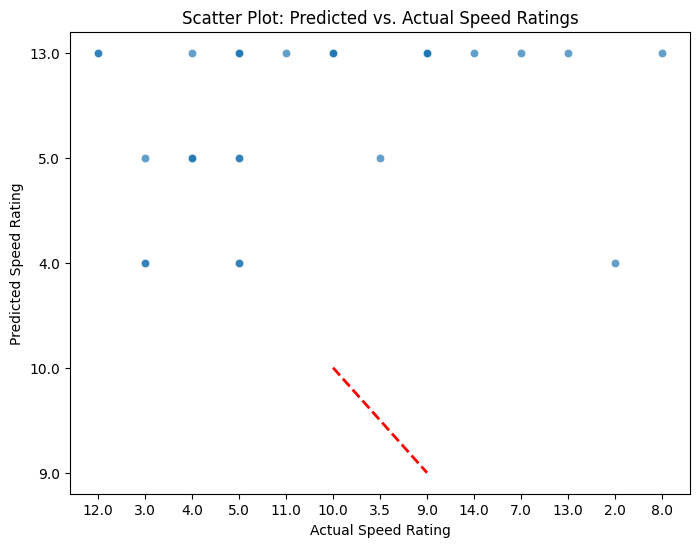

c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

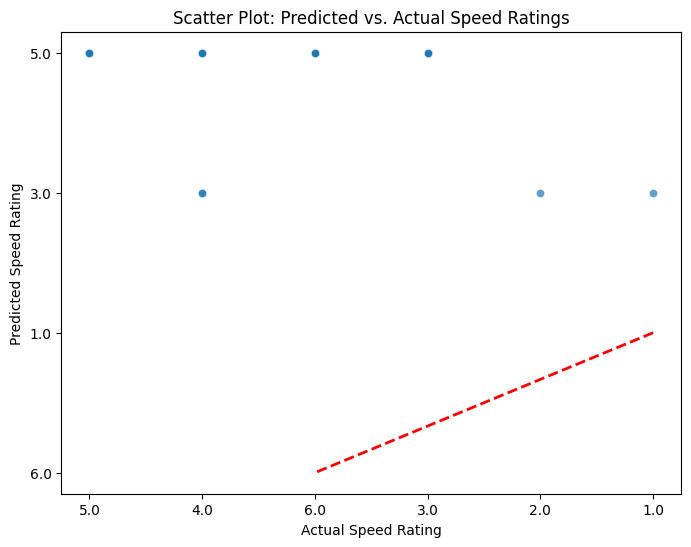

c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

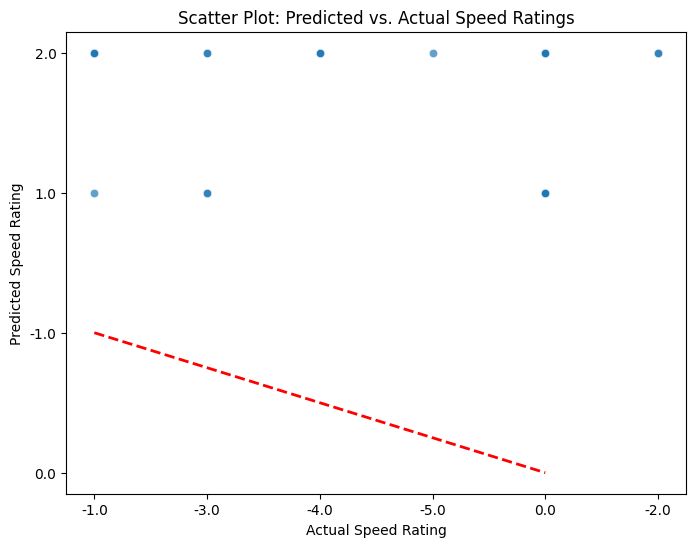

c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

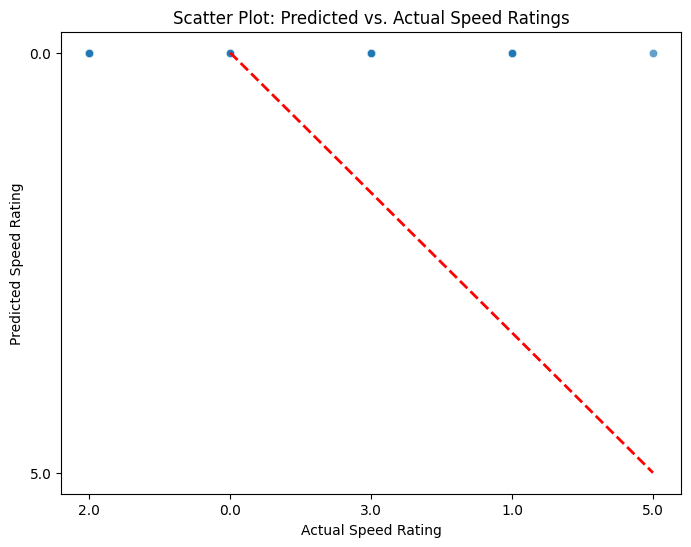

<module 'matplotlib.pyplot' from 'c:\\Users\\Kevin\\projects\\flight_numbers\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
def vizualize_results(y_test, y_predict, mse, r2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_predict, alpha=0.7)
    plt.title('Scatter Plot: Predicted vs. Actual Speed Ratings')
    plt.xlabel('Actual Speed Rating')
    plt.ylabel('Predicted Speed Rating')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

    #plt.text(min(y_test) + 1, max(y_predict) - 1, f'MSE: {mse:.2f}', fontsize=12, color='blue')
    #plt.text(min(y_test) + 1, max(y_predict) - 3, f'R-squared: {r2:.2f}', fontsize=12, color='blue')

    plt.show()
    return plt

vizualize_results(y_test_speed, y_predict_speed, mse_speed, r2_speed)
vizualize_results(y_test_glide, y_predict_glide, mse_glide, r2_glide)
vizualize_results(y_test_turn, y_predict_turn, mse_turn, r2_turn)
vizualize_results(y_test_fade, y_predict_fade, mse_fade, r2_fade)


# Next Steps
- Predict Innova trained models on different brands?
- Go back and create homebrew ratings and then pass them through to see if more accurate / consistent?
- Try other models


c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Kevin\projects\flight_numbers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

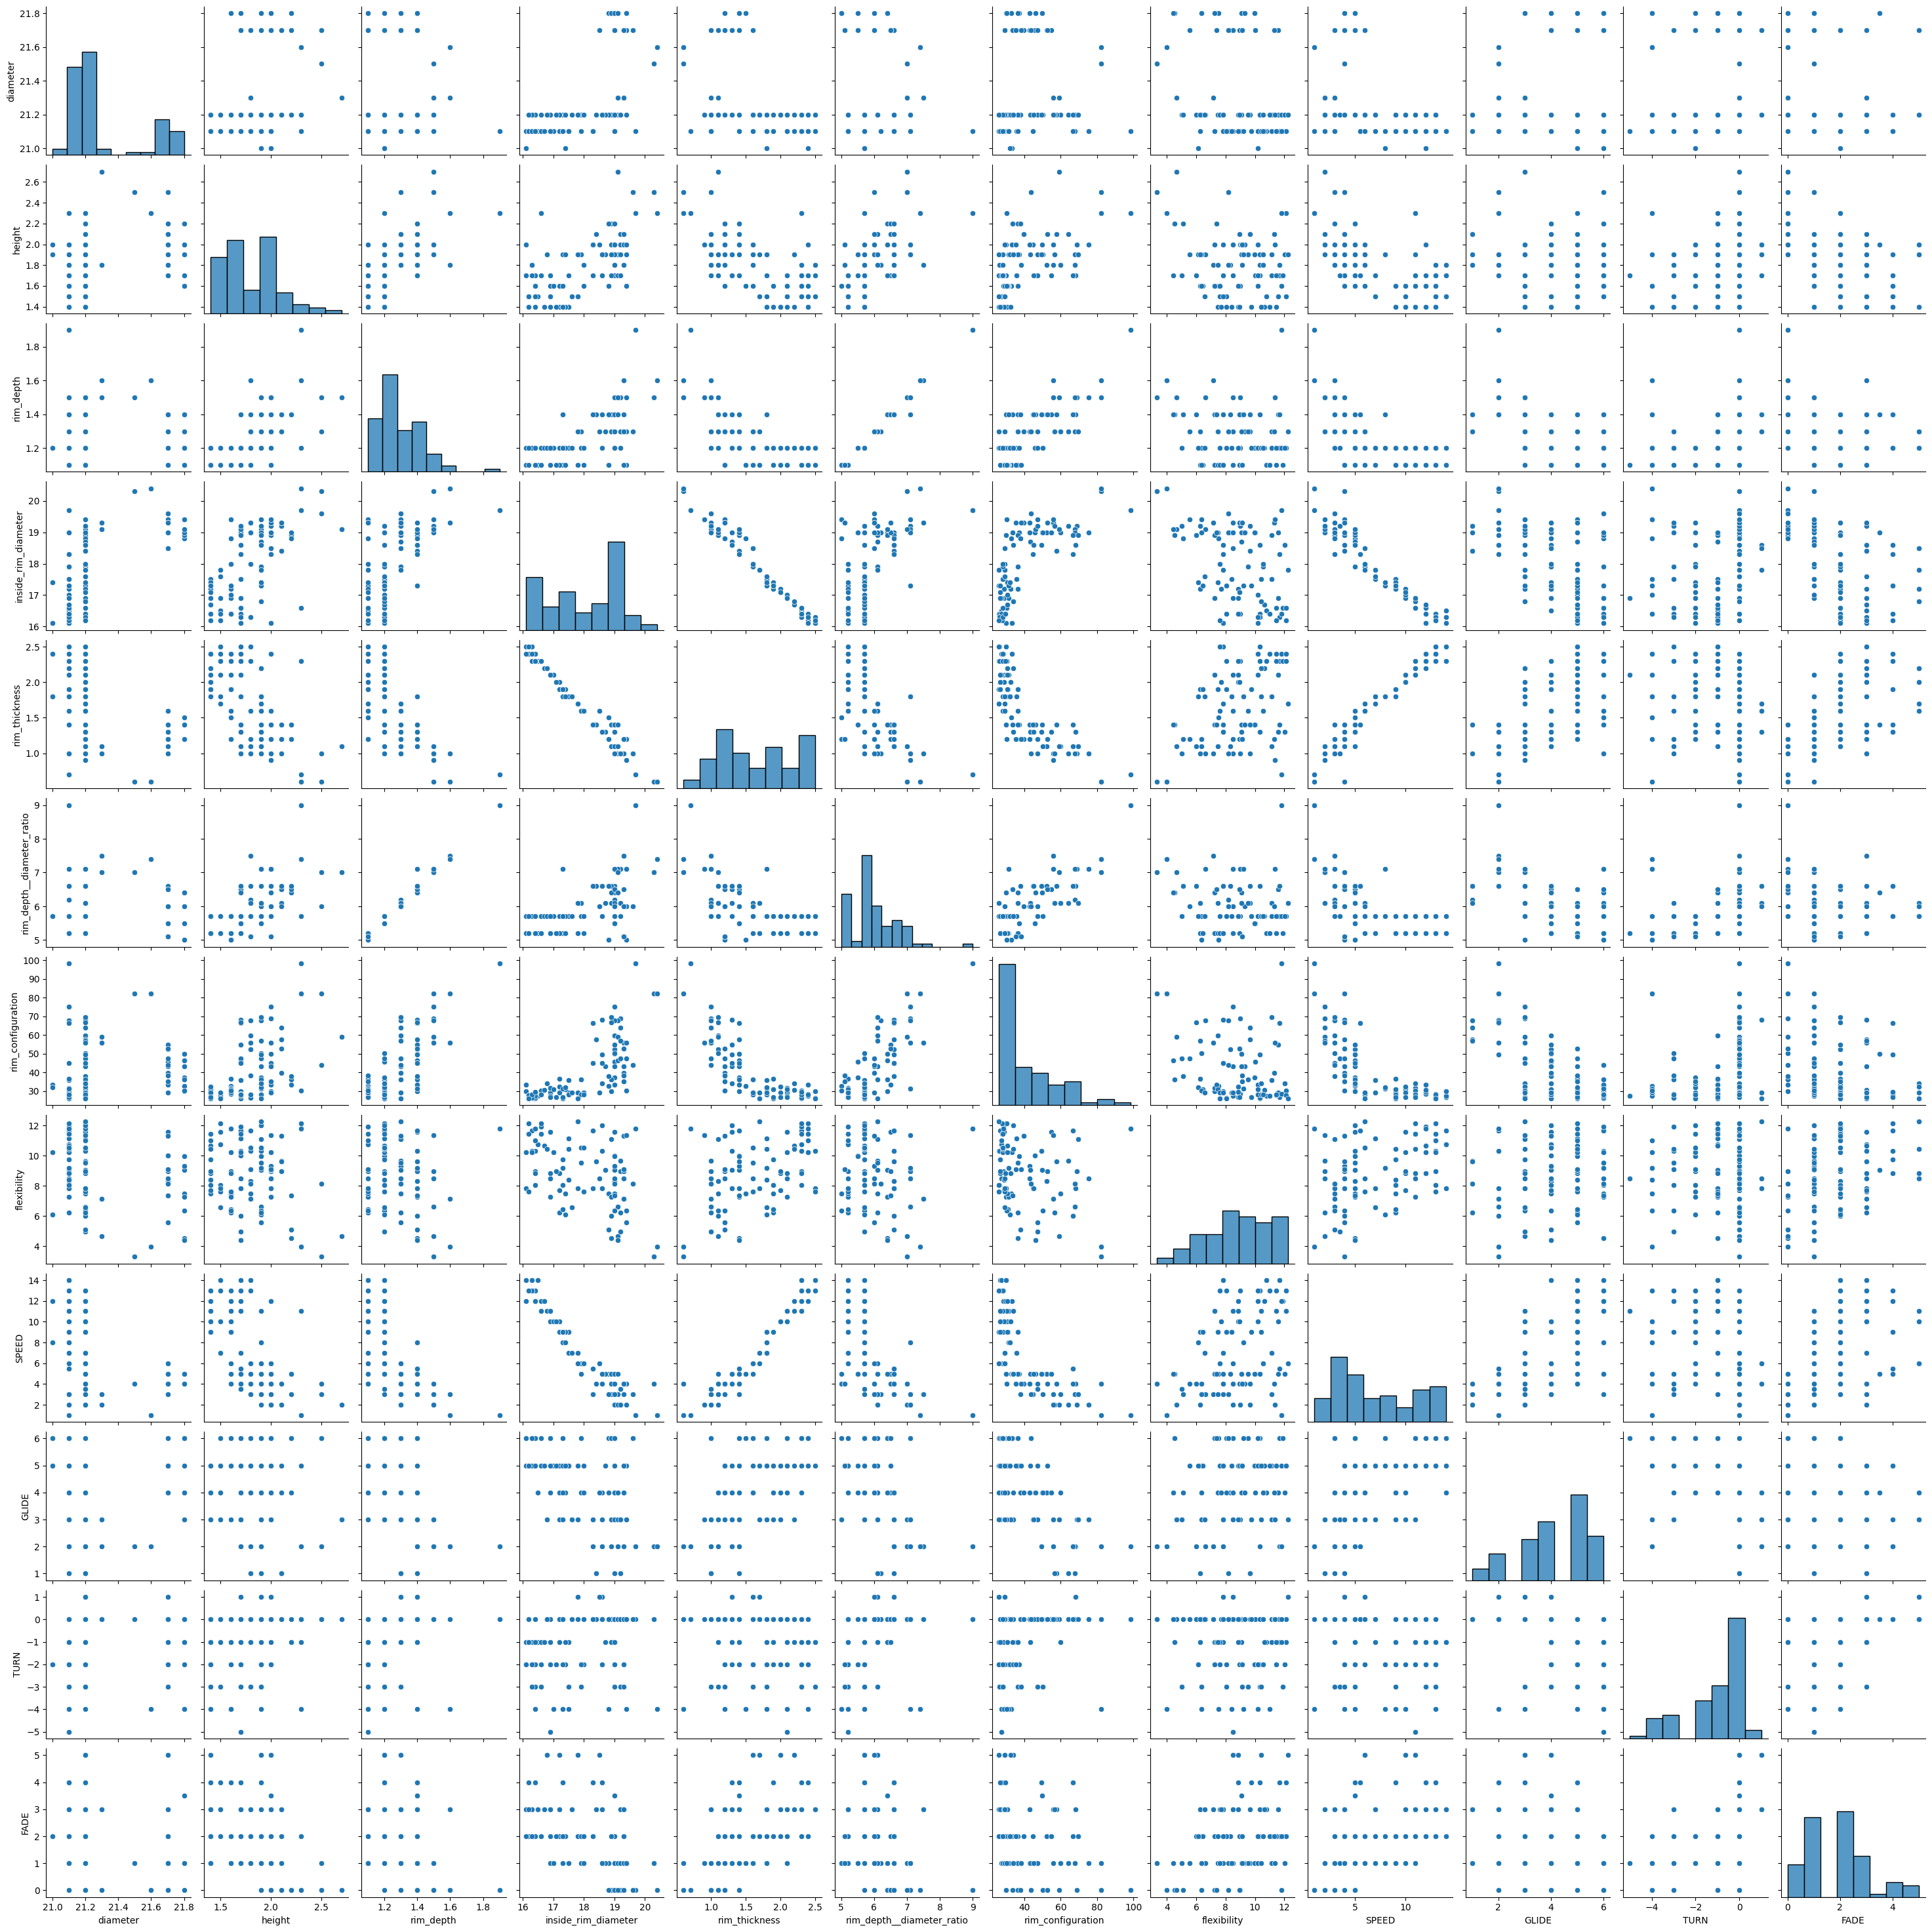

In [ ]:
sns.pairplot(df.drop(columns=['max_weight_vint', 'last_year_production', 'max_weight']))